# Import Libraries

In [13]:
import cv2
from craft_text_detector import Craft
import matplotlib.pyplot as plt
import os
import pytesseract
from skewness import *
import glob

# Tesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C://Program Files//Tesseract-OCR//tesseract.exe'

os.environ["TESSDATA_PREFIX"] =  "C://Program Files//Tesseract-OCR//tessdata"
custom_config = r'-c preserve_interword_spaces=5 --oem 3 --psm 8'

# Initialize Class

In [34]:
class CraftModule:
    def __init__(self,craft):
        self.craft = craft
        self.boxes = None
        self.image = None
    
    def plot_image(self,img):
        plt.axis('off');
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
        plt.show();
    
    def detect_text(self,image):
        self.image = image.copy()
        self.boxes = self.craft.detect_text(self.image)['boxes']
        self.plot_image(self.image)
        print('------------ Detected Text Regions ------------')
        self.draw_rectangles()
        # print('------------ Croped Text Regions ------------')
        self.show_cropped_image()

    def get_bounding_boxes(self,box):
        flat_box = box.flatten()
        x_min = round(min([flat_box[x] for x in [0,2,4,6]]))
        y_min = round(min([flat_box[y] for y in [1,3,5,7]]))
        x_max = round(max([flat_box[x] for x in [0,2,4,6]]))
        y_max = round(max([flat_box[y] for y in [1,3,5,7]]))

        return x_min,y_min,x_max,y_max
    
    def draw_rectangles(self):
        image_rect = self.image.copy()
        for box in self.boxes:
            x_min,y_min,x_max,y_max = self.get_bounding_boxes(box)
            image_rect = cv2.rectangle(image_rect, (x_min,y_min), (x_max,y_max), (255,0,0), 2)
        self.plot_image(image_rect)
            
    def show_cropped_image(self):
        for box in self.boxes:
            x_min,y_min,x_max,y_max = self.get_bounding_boxes(box)
            roi = self.image[y_min : y_max , x_min : x_max].copy()
            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            roi_invert = cv2.bitwise_not(roi_gray)
            thresh = cv2.threshold(roi_gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
            edges = cv2.Canny(roi, 27, 255)
            self.plot_image(roi_gray)
            # self.plot_image(cv2.bitwise_not(roi_gray))


            # contour, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            # print(len(contour))
            
            # text_english_t = pytesseract.image_to_string(thresh,lang = 'eng', config = custom_config)
            # text_nepali_t = pytesseract.image_to_string(thresh,lang = 'nep', config = custom_config)
            # text_nepali_hin_t = pytesseract.image_to_string(thresh,lang = 'nep+hin', config = custom_config)


            text_english = pytesseract.image_to_string(roi_invert,lang = 'eng', config = custom_config)
            text_nepali = pytesseract.image_to_string(roi_invert,lang = 'nep', config = custom_config)
            text_nepali_hin = pytesseract.image_to_string(roi_invert,lang = 'nep+hin', config = custom_config)


            print(f'English (gray) : {text_english}')
            print(f'Nepali (gray) : {text_nepali}')
            print(f'Nepali + Hindi (gray) : {text_nepali_hin}')

            # print(f'English (thresh) : {text_english_t}')
            # print(f'Nepali (thresh) : {text_nepali_t}')
            # print(f'Nepali + Hindi (thresh) : {text_nepali_hin_t}')


            self.plot_image(roi)
    

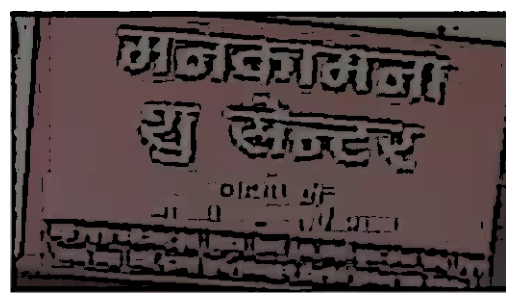

------------ Detected Text Regions ------------


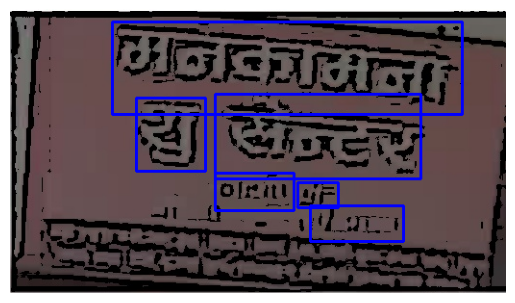

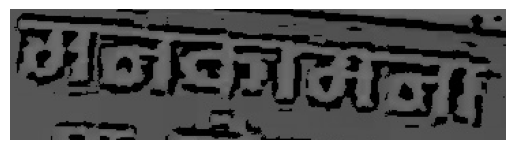

English (gray) : BloichigisTy,

Nepali (gray) : छाउन

Nepali + Hindi (gray) : छाउन



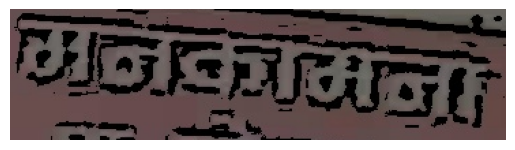

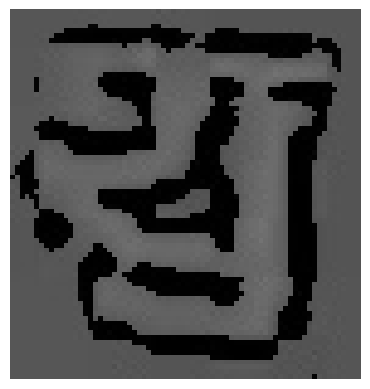

English (gray) : ]

Nepali (gray) : डी

Nepali + Hindi (gray) : डी



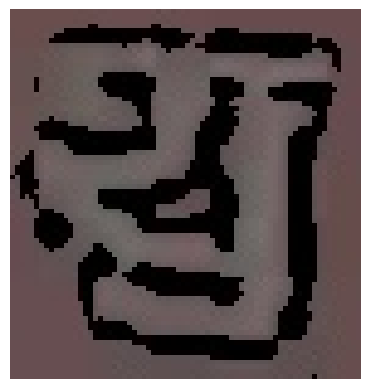

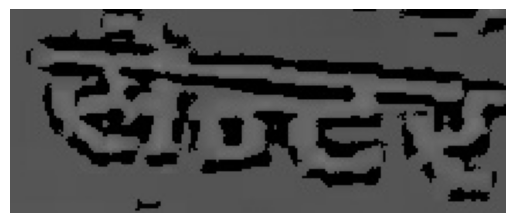

English (gray) : Tinew

Nepali (gray) : दज्छ्ल

Nepali + Hindi (gray) : नल



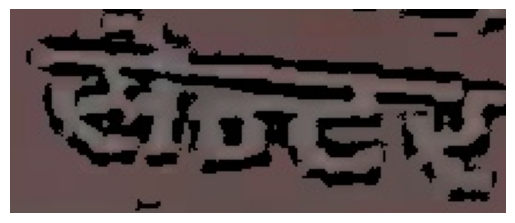

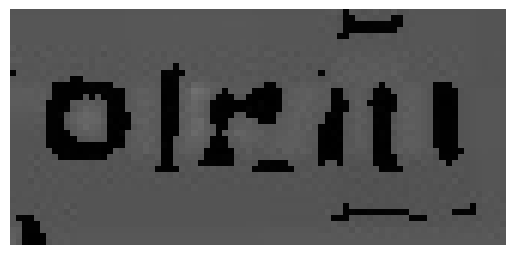

English (gray) : olwity

Nepali (gray) : चाला

Nepali + Hindi (gray) : चाला



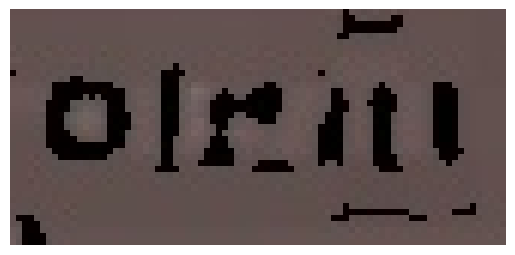

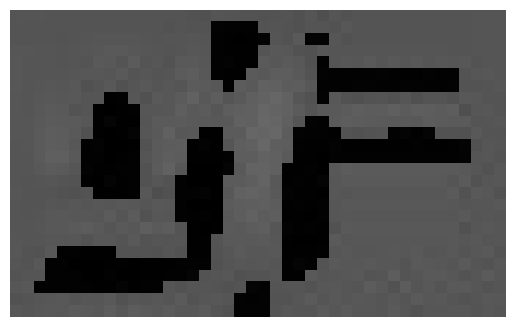

English (gray) : I

Nepali (gray) : 1

Nepali + Hindi (gray) : 1



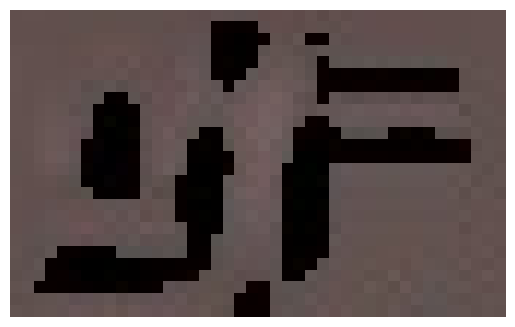

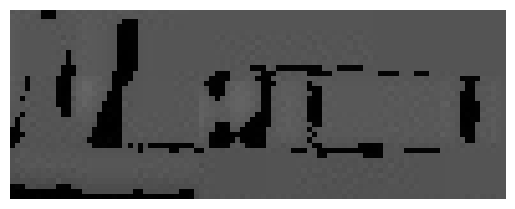

English (gray) : L ]

Nepali (gray) : 4 पा

Nepali + Hindi (gray) : 4 पा



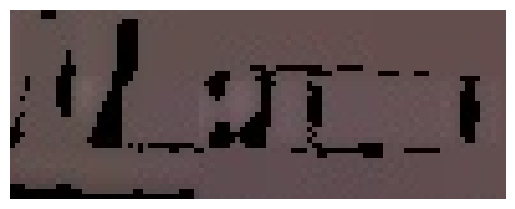

In [47]:
craft = Craft( crop_type="box", cuda=True,text_threshold=0.8,link_threshold=0.8,low_text=0.3)
img = cv2.imread('images/enhanced_image.jpg')
CraftModule(craft).detect_text(img)


In [43]:
# craft = Craft( crop_type="box", cuda=True,text_threshold=0.8,link_threshold=0.1,low_text=0.18)
# file_type=['JPG','JPEG','PNG','JFIF']
# images=[]
# #for copying later
# filename=[]
# for format in file_type:
#     for path in glob.glob(f"images/t_8_l_8_l_18_psm_8/*.{format}"):
#         img = cv2.imread(path)
#         CraftModule(craft).detect_text(img)

In [48]:
# import cv2
# import numpy as np

# def enhance_image(image_path, output_path):
#     # Read the image
#     img = cv2.imread(image_path)

#     # Apply Gaussian blur to reduce noise
#     blurred = cv2.GaussianBlur(img, (5, 5), 0)

#     # Apply adaptive thresholding to enhance edges
#     gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
#     thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

#     # Combine the thresholded image with the original using bitwise_and
#     enhanced = cv2.bitwise_and(img, img, mask=thresholded)

#     # Write the enhanced image to the output path
#     cv2.imwrite(output_path, enhanced)

# # Provide the path to your input image and the desired output path
# input_image_path = 'images/t_8_l_8_l_18_psm_8/manakamana.png'
# output_image_path = 'images/enhanced_image.jpg'

# enhance_image(input_image_path, output_image_path)

In [51]:
import cv2
import numpy as np

def deskew_text(image_path, output_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to segment the text
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through the detected contours
    for contour in contours:
        # Fit a rotated bounding box around the contour
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Calculate the angle of the bounding box
        angle = rect[-1]

        # Rotate the ROI to correct skewness
        M = cv2.getRotationMatrix2D(rect[0], angle, 1)
        rotated_roi = cv2.warpAffine(img, M, img.shape[1::-1], flags=cv2.INTER_LINEAR)

        # Overlay the rotated ROI onto the original image
        img = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
        img = cv2.polylines(img, [box], isClosed=True, color=(0, 255, 0), thickness=2)
        img = cv2.addWeighted(img, 0.5, rotated_roi, 0.5, 0)

    # Save the output image
    cv2.imwrite(output_path, img)

# Provide the path to your input image and the desired output path
input_image_path = 'images/test_o.png'
output_image_path = 'images/deskewed_image.png'

deskew_text(input_image_path, output_image_path)


# Predict